In this notebook, We will create Kmeans algorithm just using dataset

In [2]:
# Data handling
import pandas as pd 
import numpy as np

# Clustering
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize

# Dimensionality reduction
from sklearn.decomposition import PCA

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.style as style
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [3]:
def prepare_pca(n_components, data, kmeans_labels):
    """ prepare pca with n dimension
    """
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix

def plot_3d(df, name='labels'):
    """ plot 3d scatter
    """
    iris = px.data.iris()
    fig = px.scatter_3d(df, x='x', y='y', z='z',color=name)
    fig.update_traces(marker=dict(size=3))
    fig.show()
    
    
def load_preprocess_data():
    """ Load and preprocess data
    """
    # load dataset
    df = pd.read_csv('data_credit_card_customer_seg.csv')
    
    # handle missing values by replace it by means
    df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
    df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
    
    # drop unnecessary column
    df.drop('CUST_ID', axis=1, inplace=True)
    
    return  df

df = load_preprocess_data()
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        864.206542          0.000000      12  
4   678.334763        244.791237          0.000000      12

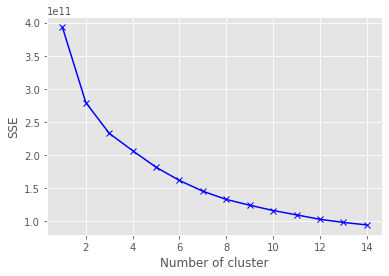

In [4]:
style.use('ggplot')

# Choosing the K value using elbow method 
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

It's hard to find the elbow point of the curve, so we use silhouette score.

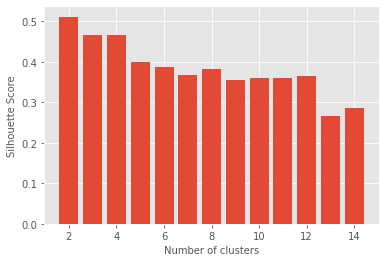

In [129]:
# silhouette score
silhouette_scores = []

for n_cluster in range(2, 15):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 

plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Highest silhouette score is k = 2.

# Kmeans clustering

Let's visualize k=2,3,4

# k=2

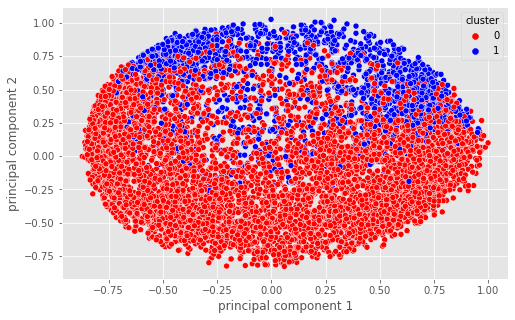

In [6]:
# Kmeans algorithm
kmean= KMeans(n_clusters=2)
kmean.fit(df)
labels=kmean.labels_


# feature scaling for visualization
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

# PCA to transform data to 2 dimensions for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)

# scatterplot
plt.figure(figsize=(8,5))
ax = sns.scatterplot( data=finalDf,x="principal component 1", y="principal component 2", hue="cluster",palette=['red','blue'])
plt.show()

In [9]:
#3D plot
pca_df = prepare_pca(3, normalized_df, labels)
plot_3d(pca_df)

In [132]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters['cluster'].value_counts()

1    7028
0    1922
Name: cluster, dtype: int64

In [114]:
clusters.groupby('cluster').mean()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
0        3836.162593           0.939761  2365.531020       1552.705390   
1         943.219295           0.860181   630.639249        329.825656   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    813.209579   2593.084115             0.557363   
1                    301.090867    537.420146             0.472024   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.346012                          0.405358   
1                          0.163199                          0.353246   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                      0.227188          6.558793      28.010926   
1                      0.109972          2.343625      11.072282   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                  
0         9822.062719  4297.319366       1766.959160          0.149363   
1         3037.466994  1031.899496        617.323997          0.154905   

            TENURE  
cluster             
0        11.739854  
1        11.456460

Text(0.5, 0, 'SEGMENTS')

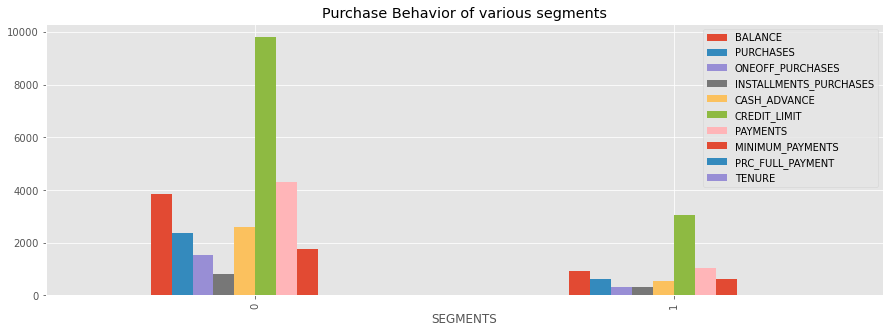

In [115]:
(clusters[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
           'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS', 
           'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE', 'cluster']]
 .groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS')

## k=3

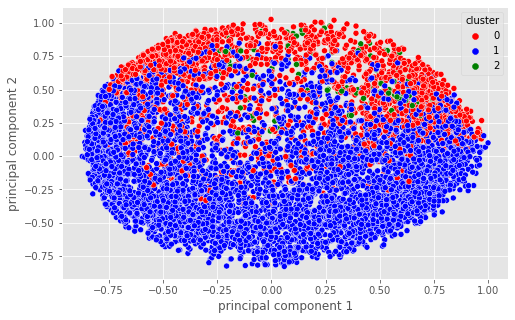

In [7]:
# Kmeans algorithm
kmean= KMeans(n_clusters=3,init='k-means++',n_init=10)
kmean.fit(df)
labels=kmean.labels_

# feature scaling for visualization
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

# PCA to transform data to 2 dimensions for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)

# scatterplot
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','blue','green'])
plt.show()

In [8]:
pca_df = prepare_pca(3, normalized_df, labels)
plot_3d(pca_df)

In [10]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters['cluster'].value_counts()

1    6540
0    2279
2     131
Name: cluster, dtype: int64

In [136]:
clusters.groupby('cluster').mean()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                   
0         855.227995           0.854317    604.230613        312.600302   
1        3395.311946           0.940607   1583.210797        989.995002   
2        4841.893262           0.911252  10789.305615       7619.684385   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    291.928959    494.710006             0.467773   
1                    593.527756   2119.008735             0.539699   
2                   3169.790462   5152.220129             0.752378   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.154211                          0.352458   
1                          0.317137                          0.384921   
2                          0.599535                          0.604123   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                      0.106715          2.252107      10.678008   
1                      0.210796          5.745534      22.123312   
2                      0.226540          9.200000      86.200000   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                   
0         2748.638779    997.108463        585.561341          0.157008   
1         9006.494355   2897.707533       1562.924012          0.134113   
2        12465.769231  18117.430507       2515.001531          0.334474   

            TENURE  
cluster             
0        11.433257  
1        11.738126  
2        11.838462

Text(0.5, 0, 'SEGMENTS')

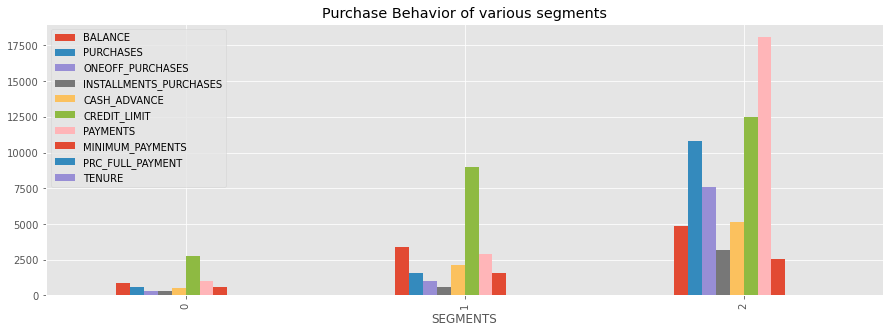

In [137]:
(clusters[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
           'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS', 
           'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE', 'cluster']]
 .groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS')

## k=4

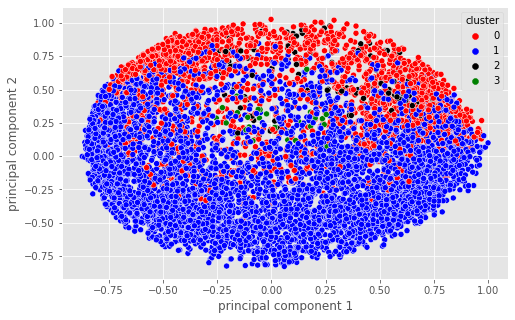

In [11]:
# Kmeans algorithm
kmean= KMeans(n_clusters=4)
kmean.fit(df)
labels=kmean.labels_

# feature scaling for visualization
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 

# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

# PCA to transform data to 2 dimensions for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame({'cluster':labels})], axis = 1)

# scatterplot
plt.figure(figsize=(8,5))
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="cluster", data=finalDf,palette=['red','blue','black','green'])
plt.show()

In [139]:
pca_df = prepare_pca(3, normalized_df, labels)
plot_3d(pca_df)

In [140]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters['cluster'].value_counts()

1    6444
2    2317
0     133
3      56
Name: cluster, dtype: int64

In [141]:
clusters.groupby('cluster').mean()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                   
0        4748.991790           0.907786  10465.636391       7440.024662   
1         854.174471           0.853029    599.808225        310.304151   
2        3296.882710           0.940248   1581.379461        995.494791   
3        4058.147688           0.988636   1027.378750        118.389464   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                   3025.777143   5409.993897             0.735407   
1                    289.806476    495.445503             0.466256   
2                    586.193669   2070.367719             0.543755   
3                    908.989286    922.757849             0.471320   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.585386                          0.589869   
1                          0.152693                          0.351769   
2                          0.322826                          0.384875   
3                          0.039232                          0.441153   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                      0.229576          9.195489      83.473684   
1                      0.107138          2.257914      10.607076   
2                      0.208326          5.668968      22.078550   
3                      0.105655          3.017857      18.625000   

         CREDIT_LIMIT      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
cluster                                                                   
0        12481.578947  18066.318410       2349.030588          0.329257   
1         2714.535698    993.655827        531.178882          0.156275   
2         8991.715384   2854.856446       1175.981442          0.140197   
3         4267.857143   1624.939144      22760.031552          0.001488   

            TENURE  
cluster             
0        11.842105  
1        11.427995  
2        11.737592  
3        11.910714

Text(0.5, 0, 'SEGMENTS')

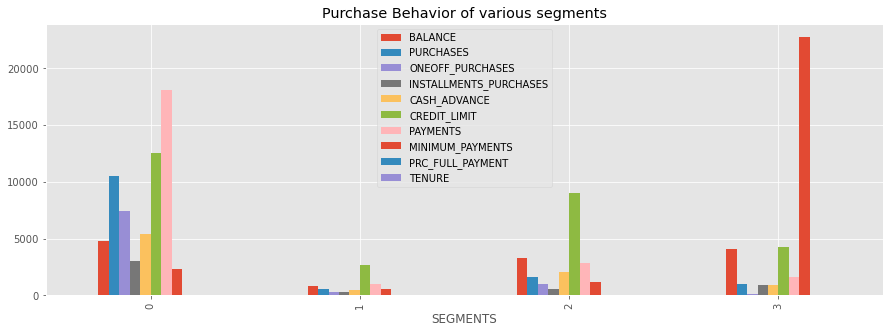

In [142]:
(clusters[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
           'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS', 
           'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT','TENURE', 'cluster']]
 .groupby('cluster').mean().plot.bar(figsize=(15, 5)))
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS')